In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Handling Training data first

In [2]:
df1 = pd.read_csv('train.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dd = pd.read_csv('test.csv')
df1 = pd.concat([df1, dd], ignore_index = True) 

In [47]:
pred_x = dd.drop(['Id'], axis = 1)

In [4]:
df2 = df1.drop(['Id'], axis = 1)
# df2.info()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


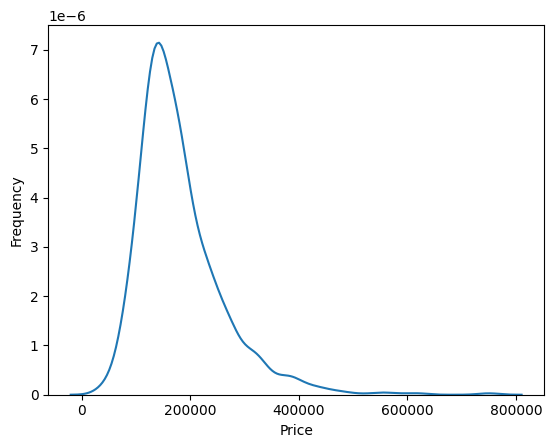

In [5]:
import warnings
warnings.filterwarnings('ignore')

print(df2['SalePrice'].describe())
plt.xlabel("Price")
plt.ylabel("Frequency")
sb.kdeplot(data = df2.SalePrice);

In [6]:
null_column = df2.columns[df2.isnull().sum() > (len(df2) // 3)]
print(null_column)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], dtype='object')


In [48]:
null_column = pred_x.columns[pred_x.isnull().sum() > (len(pred_x) // 3)]
print(null_column)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [7]:
df3 = df2.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
df3.shape

(2919, 76)

In [49]:
pred_x = pred_x.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
pred_x.shape

(1459, 75)

In [8]:
df3 = df3.drop(['FireplaceQu', 'GarageYrBlt'], axis = 1)

In [50]:
pred_x = pred_x.drop(['FireplaceQu', 'GarageYrBlt'], axis = 1)

In [9]:
df3.shape

(2919, 74)

In [10]:
# Changing all the columns with categorical data having null values with their mode
categorical_column_with_null = df3.columns[(df3.isnull().any()) & (df3.dtypes == 'object')]
print(categorical_column_with_null)

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')


In [53]:
categorical_column_with_null = pred_x.columns[(pred_x.isnull().any()) & (pred_x.dtypes == 'object')]
print(categorical_column_with_null)

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')


In [52]:
def replacing_val_mod(df3):
    for col in categorical_column_with_null:
        df3[col] = df3[col].fillna(df3[col].mode()[0])
    return df3
df4 = replacing_val_mod(df3)
df4.shape

(2919, 74)

In [54]:
def replacing_val_mod1(df3):
    for col in categorical_column_with_null:
        df3[col] = df3[col].fillna(df3[col].mode()[0])
    return df3
pred_x = replacing_val_mod1(pred_x)
pred_x.shape

(1459, 73)

In [12]:
# Checking if there is still some null value in categorical data left
numerical_column_with_null2 = df4.columns[(df4.isnull().any()) & (df4.dtypes == 'float64')]
print(numerical_column_with_null2)

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


In [55]:
numerical_column_with_null2 = pred_x.columns[(pred_x.isnull().any()) & (pred_x.dtypes == 'float64')]
print(numerical_column_with_null2)

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'GarageArea'],
      dtype='object')


In [13]:
# Handling null values in float values
def replacing_val_mean(df3):
    for col in numerical_column_with_null2:
        df3[col] = df3[col].fillna(df3[col].mean())
    return df3
df5 = replacing_val_mean(df4)
df5.shape

(2919, 74)

In [56]:
def replacing_val_mean(df3):
    for col in numerical_column_with_null2:
        df3[col] = df3[col].fillna(df3[col].mean())
    return df3
pred_x = replacing_val_mean(pred_x)
pred_x.shape

(1459, 73)

In [14]:
df5.columns[(df5.isnull().any())]

Index([], dtype='object')

In [57]:
pred_x.columns[(pred_x.isnull().any())]

Index([], dtype='object')

In [15]:
# Applying One hot encoding to all the categorical column
categorical_column = df5.columns[(df5.dtypes == 'object')]
categorical_column

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [60]:
categorical_column = pred_x.columns[(pred_x.dtypes == 'object')]
categorical_column

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
# Not using One hot encoder again as it is frustating I have just working to convert numpy array back to dataframe for hours and it is not working
# So instead just using the Pandas dummies

def one_hot_encoding(categorical_columns, df):
    df_final = df
    i = 0
    for col in categorical_columns:
        dff = pd.get_dummies(df[col], drop_first=True)
        df = df.drop([col], axis = 1)
        if i == 0:
            i = i + 1
            df_final = dff.copy()
        else:
            df_final = pd.concat([df_final, dff], axis = 1)
    
    df_final = pd.concat([df_final, df], axis = 1)
    return df_final

df6 = one_hot_encoding(categorical_column, df5)

In [61]:
def one_hot_encoding1(categorical_columns, df):
    df_final = df
    i = 0
    for col in categorical_columns:
        dff = pd.get_dummies(df[col], drop_first=True)
        df = df.drop([col], axis = 1)
        if i == 0:
            i = i + 1
            df_final = dff.copy()
        else:
            df_final = pd.concat([df_final, dff], axis = 1)
    
    df_final = pd.concat([df_final, df], axis = 1)
    return df_final

pred_x = one_hot_encoding1(categorical_column, pred_x)

In [17]:
df6.head(4)
# Encoding completed

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0


In [62]:
pred_x.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,0,0,1,0,0,1,0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0,0,1,0,1,0,0,0,0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0,0,1,0,1,0,0,0,0,0,...,482.0,212,34,0,0,0,0,0,3,2010
3,0,0,1,0,1,0,0,0,0,0,...,470.0,360,36,0,0,0,0,0,6,2010
4,0,0,1,0,1,0,0,0,1,0,...,506.0,0,82,0,0,144,0,0,1,2010


In [18]:
final_df = df6.loc[ : , ~df6.columns.duplicated()]
final_df.shape

(2919, 176)

In [63]:
pred_x = pred_x.loc[ : , ~pred_x.columns.duplicated()]
pred_x.shape

(1459, 165)

In [19]:
final_df.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [73]:
pred_x_val = final_df.iloc[1459 : -1, :-1]

In [74]:
print(pred_x_val)

      FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  ...  GarageArea  \
1459   0   0   1   0     1    0    0    1    0    0  ...       276.0   
1460   0   1   0   0     1    0    0    1    0    0  ...       730.0   
1461   0   0   1   0     1    0    0    0    0    0  ...       312.0   
1462   0   0   1   0     1    0    0    0    0    0  ...       482.0   
1463   0   0   1   0     1    0    0    0    0    0  ...       470.0   
...   ..  ..  ..  ..   ...  ...  ...  ...  ...  ...  ...         ...   
2913   0   0   0   1     1    0    0    1    0    0  ...         0.0   
2914   0   0   0   1     1    0    0    1    0    0  ...         0.0   
2915   0   0   0   1     1    0    0    1    0    0  ...       286.0   
2916   0   0   1   0     1    0    0    1    0    0  ...       576.0   
2917   0   0   1   0     1    0    0    1    0    0  ...         0.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1459         736           68              0          0        

In [20]:
X = final_df.iloc[ : , : -1].values
y = final_df.iloc[ : , -1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### XGBoost Classifier

In [22]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
param_grid = {
    'n_estimators' : [200, 600, 1000, 1200, 1600],
    'max_depth' : [2, 4, 7, 10, 16],
    'learning_rate' : [0.05, 0.1, 0.16, 0.2],
    'min_child_weight' : [1, 2, 3, 4],
    'booster' : ['gbtree', 'gblinear'],
    'base_score' : [0.25, 0.5, 0.75, 1]
}

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = RandomizedSearchCV(estimator = classifier,
                           param_distributions = param_grid, 
                           cv = 5, 
                           n_iter=50,
                           scoring = 'neg_mean_squared_error',
                           return_train_score=True,
                           random_state = 25
                          )


In [34]:
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.16, 0.2],
                                        'max_depth': [2, 4, 7, 10, 16],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [200, 600, 1000, 1200,
                                                         1600]},
                   random_state=25, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [35]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(X_test))
mse

1751337903.1227856

In [39]:
xg_regressor = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [40]:
xg_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
import pickle
filename = 'XGBoost_file.pkl'
pickle.dump(xg_regressor, open(filename, 'wb'))

In [76]:
y_pred_xg = xg_regressor.predict(pred_x_val)
len(y_pred)

1459

In [77]:
# Creating Sample file for submission
pred = pd.DataFrame(y_pred_xg)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis = 1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)

### Random Forest with tuning

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 5, 8], 
    'max_leaf_nodes': [3, 5, 8], 
}

grid_search = RandomizedSearchCV(RandomForestRegressor(), 
                           param_grid)

In [26]:
grid_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 5, 8],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 5, 8],
                                        'n_estimators': [25, 50, 100, 150]})

In [27]:
mse = mean_squared_error(y_test, grid_search.predict(X_test))
mse

1633739832.3451893

### SVR

In [79]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_1 = sc_X.fit_transform(X_train)

# If y_train is a 1D array, reshape it to 2D
y_train_1 = y_train.reshape(-1, 1)
sc_y = StandardScaler()
y_train_1 = sc_y.fit_transform(y_train_1)

In [80]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_1, y_train_1)

SVR()

In [81]:
X_test_1 = sc_X.fit_transform(X_test)
y_test_1 = y_test.reshape(-1, 1)
y_test_1 = sc_y.fit_transform(y_test_1)
mse = mean_squared_error(y_test_1, regressor.predict(X_test_1))
print(mse)

0.7151945428461883


In [82]:
y_pred_svm = regressor.predict(pred_x_val)
len(y_pred_svm)

1459

In [83]:
# Creating Sample file for submission
pred = pd.DataFrame(y_pred_svm)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis = 1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [ ]:
mse = mean_squared_error(y_test, grid_search.predict(X_test))
print(mse)